In [2]:
import os

from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.datasets
import torch
import PIL
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 128
number_of_labels = 42
learning_rate = 0.001
num_epochs = 150
classes = ('abraham_grampa_simpson',
            'agnes_skinner',
            'apu_nahasapeemapetilon',
            'barney_gumble',
            'bart_simpson',
            'carl_carlson',
            'charles_montgomery_burns',
            'chief_wiggum',
            'cletus_spuckler',
            'comic_book_guy',
            'disco_stu',
            'edna_krabappel',
            'fat_tony',
            'gil',
            'groundskeeper_willie',
            'homer_simpson',
            'kent_brockman',
            'krusty_the_clown',
            'lenny_leonard',
            'lionel_hutz',
            'lisa_simpson',
            'maggie_simpson',
            'marge_simpson',
            'martin_prince',
            'mayor_quimby',
            'milhouse_van_houten',
            'miss_hoover',
            'moe_szyslak',
            'ned_flanders',
            'nelson_muntz',
            'otto_mann',
            'patty_bouvier',
            'principal_skinner',
            'professor_john_frink',
            'rainier_wolfcastle',
            'ralph_wiggum',
            'selma_bouvier',
            'sideshow_bob',
            'sideshow_mel',
            'snake_jailbird',
            'troy_mcclure',
            'waylon_smithers')
class_encoder = {}
for i in range(len(classes)):
    class_encoder[classes[i]]=i
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_labels = os.listdir(img_dir)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir,self.img_labels[idx])
        image = PIL.Image.open(img_path)
        label = self.img_labels[idx]
        class_indicator = label.rfind('_')
        class_str = label[:class_indicator]
        label = class_encoder[class_str]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
# Loading and normalizing the data.
# Define transformations for the training and test sets
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2023, 0.1994, 0.2010]),
    transforms.Resize((32,32))
])


full_dataset = torchvision.datasets.ImageFolder("./characters",transformations)
train_dataset,valid_dataset = torch.utils.data.random_split(full_dataset,[0.7, 0.3])
train_dataset, test_set = torch.utils.data.random_split(full_dataset,[0.8, 0.2])
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=16)
print("The number of images in a training set is: ", len(train_loader)*batch_size)

test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=16)
print("The number of images in a test set is: ", len(test_loader)*batch_size)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=16)
print("The number of images in validation set is: ",len(valid_loader)*batch_size)
print("The number of batches per epoch is: ", len(train_loader))


The number of images in a training set is:  16768
The number of images in a test set is:  4224
The number of images in validation set is:  6400
The number of batches per epoch is:  131


In [3]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(64)
        )
        self.conv2 = nn.Sequential(
                nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(64)
        )
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Sequential(
                nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(128)
        )
        self.conv5 = nn.Sequential(
                nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(128)
        )
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(256)
        )
        self.conv7 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(256)
        )
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv8 = nn.Sequential(
                nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(512)
        )
        self.conv9 = nn.Sequential(
                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(512)
        )
        self.pool3 = nn.MaxPool2d(2,2)
        self.conv10 = nn.Sequential(
                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(512)
        )
        self.fc1 = nn.Linear(512*2*2, 42)

    def forward(self, input):
        output = F.relu(self.conv1(input))
        output = F.relu(self.conv2(output))
        output = self.pool(output)
        output = F.relu(self.conv4(output))
        output = F.relu(self.conv5(output))
        output = self.pool1(output)
        output = F.relu(self.conv6(output))
        output = F.relu(self.conv7(output))
        output = self.pool2(output)
        output = F.relu(self.conv8(output))
        output = F.relu(self.conv9(output))
        output = self.pool3(output)
        output = F.relu(self.conv10(output))
        output = output.view(-1, 512*2*2)
        output = self.fc1(output)
        return output

# Instantiate a neural network model 
model = Network().to(device)

In [4]:
from torch.optim import SGD
 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=3, verbose=True, threshold=1e-2
)

In [5]:
from torch.autograd import Variable
import tqdm
# Function to save the model
def saveModel():
    path = "./simpsons.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    metric = torchmetrics.Recall(task="multiclass", num_classes=42).to(device)
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
            metric(predicted, labels)
    recall = metric.compute()
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return accuracy, recall

loss_metric =[]
recall_metric=[]
accuracy_metric=[]
lr_metric=[]

def train():
    
    best_accuracy = 0.0

    # Define your execution device
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    for epoch in tqdm.tnrange(num_epochs,position=0,desc="Epochs"):  # loop over the dataset multiple times
        losses = []

        for i, (images, labels) in enumerate(tqdm.tqdm_notebook(train_loader,position=1,desc="Batch iter",leave=True), 0):

            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            losses.append(loss.item())
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()
        mean_loss = sum(losses) / len(losses)
        scheduler.step(mean_loss)
        print(f"Loss at epoch {epoch} = {mean_loss}")
        # Compute and print the average accuracy fo this epoch when tested over all test images
        accuracy, recall = testAccuracy()
        loss_metric.append(mean_loss)
        accuracy_metric.append(accuracy)
        recall_metric.append(recall)
        print(f"For epoch {epoch} recall: {recall}")
        print(f'For epoch {epoch} the test accuracy over the whole test set is {accuracy} %')
        
        # we want to save the model if the accuracy is the best
        if recall > best_accuracy:
            saveModel()
            best_accuracy = recall

In [6]:
import torchmetrics
# Function to test what classes performed well
def testClassess():
    metric = torchmetrics.Accuracy(task="multiclass", num_classes=42,average=None).to(device)
    with torch.no_grad():
        for data in valid_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            metric(predicted, labels)
    acc = metric.compute()
    for i in range(number_of_labels):
        print(f'Accuracy of {classes[i]} : {acc[i]}')

In [7]:
import torchinfo


torchinfo.summary(model, depth=2, input_size=(128, 3, 32,32), row_settings=["var_names"], verbose=0, col_names=[
"input_size", "output_size", "num_params", "params_percent", "kernel_size", "mult_adds", "trainable"])

C:\Users\egors\PycharmProjects\simpsons_cnn\venv\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
C:\Users\egors\PycharmProjects\simpsons_cnn\venv\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Param %                   Kernel Shape              Mult-Adds                 Trainable
Network (Network)                        [128, 3, 32, 32]          [128, 42]                 --                             --                   --                        --                        True
├─Sequential (conv1)                     [128, 3, 32, 32]          [128, 64, 32, 32]         --                             --                   --                        --                        True
│    └─Conv2d (0)                        [128, 3, 32, 32]          [128, 32, 32, 32]         896                         0.01%                   [3, 3]                    117,440,512               True
│    └─Conv2d (1)                        [128, 32, 32, 32]         [128, 64, 32, 32]         18,496                      0.12%                   [3, 3]                    2,424,307,712   

In [8]:
if __name__ == "__main__":
    train()
    print('Finished Training')
    model = Network().to(device)
    path = "simpsons.pth"
    model.load_state_dict(torch.load(path))
    testClassess()

The model will be running on cuda device


C:\Users\egors\AppData\Local\Temp\ipykernel_10236\3129395804.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for epoch in tqdm.tnrange(num_epochs,position=0,desc="Epochs"):  # loop over the dataset multiple times


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\egors\AppData\Local\Temp\ipykernel_10236\3129395804.py:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (images, labels) in enumerate(tqdm.tqdm_notebook(train_loader,position=1,desc="Batch iter",leave=True), 0):


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 0 = 2.1460447211301963
For epoch 0 recall: 0.5262780785560608
For epoch 0 the test accuracy over the whole test set is 52.627806975633064 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 1 = 3.131886771617045
For epoch 1 recall: 0.19397993385791779
For epoch 1 the test accuracy over the whole test set is 19.39799331103679 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 2 = 2.610426152935465
For epoch 2 recall: 0.32990923523902893
For epoch 2 the test accuracy over the whole test set is 32.9909221213569 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 3 = 2.1184283176451237
For epoch 3 recall: 0.4794553220272064
For epoch 3 the test accuracy over the whole test set is 47.94553272814142 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 4 = 1.6674703550702743
For epoch 4 recall: 0.5473005175590515
For epoch 4 the test accuracy over the whole test set is 54.73005255613951 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

Loss at epoch 5 = 1.3183187027923933
For epoch 5 recall: 0.590062141418457
For epoch 5 the test accuracy over the whole test set is 59.006211180124225 %


Batch iter:   0%|          | 0/131 [00:00<?, ?it/s]

KeyboardInterrupt: 

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

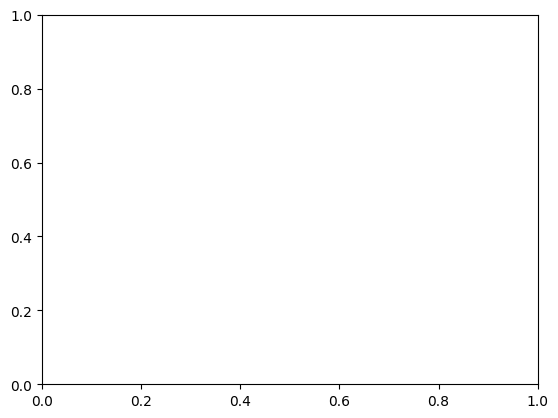

In [15]:
import matplotlib.pyplot as plt
import numpy as np
epochs = [i for i in range(num_epochs)]
fig, ax = plt.subplots()
ax.plot(recall_metric,epochs,label="Recall")
ax.plot(loss_metric,epochs,label="Loss")
ax.plot(accuracy_metric,epochs,label="Accuracy")
plt.legend()
plt.show()